<a href="https://colab.research.google.com/github/Codingly2002/Number_Recognition_MNIST/blob/main/NumberRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

# scaling the values

X_train = X_train/255
X_test = X_test/255

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])



In [4]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2948 - accuracy: 0.9137
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1358 - accuracy: 0.9588
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1005 - accuracy: 0.9687
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0823 - accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0665 - accuracy: 0.9797
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0593 - accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0487 - accuracy: 0.9841
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0446 - accuracy: 0.9858
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0366 - accuracy: 0.9879
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1080 - accuracy: 0.9731


In [ ]:
Y_pred = model.predict(X_test)
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]


313/313 [==============================] - 0s 1ms/step


Text(0.5, 47.7222222222222, 'Predicted Labels')

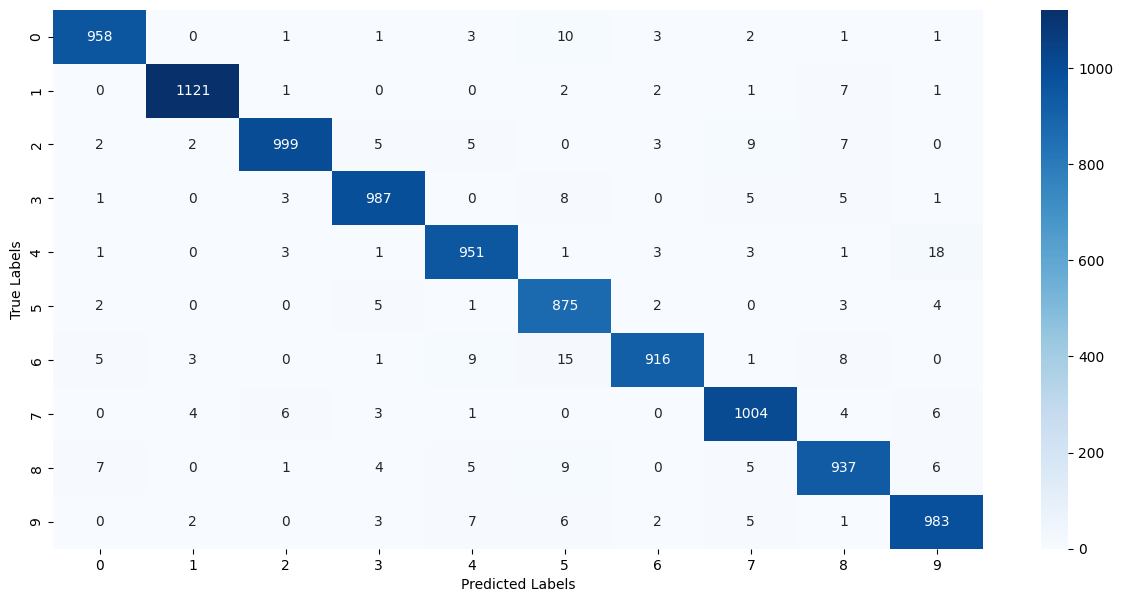

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Predictive system


In [7]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

Path of the image to be predicted: /content/Number.png


1/1 [==============================] - 0s 33ms/step
The Handwritten Digit is recognised as  5
